# Lab Session: Data Clustering and Dimensionality Reduction


# 1. Dimensionality Reduction

Dimensionality reduction is a key technique in data science used to reduce the number of features describing the input variables in a dataset. High-dimensional data, often found in many real-world datasets, can be challenging to analyze and visualize.  Additionally, a higher number of variables requires more samples to represent all possible combinations of feature values, complicating the model and increasing the risk of overfitting.  Dimensionality reduction techniques help in simplifying the model, reducing computational costs, and improving visualization while retaining most of the important information.

Common methods include:
* **Multidimensional Scaling (MDS):** 
A technique used for analyzing similarity or dissimilarity data. It aims to place each object in N-dimensional space such that the distances are preserved as well as possible.
* * MDS starts with a matrix of item–item similarities.
* * It then assigns a location to each item in N-dimensional space where the distances are preserved as well as possible.

*  **t-Distributed Stochastic Neighbor Embedding (t-SNE):** 
A non-linear technique particularly suited for the visualization of high-dimensional datasets. It reduces dimensionality while trying to keep similar instances close and dissimilar instances apart, focusing on preserving the local structures.
* * Start with computing the pairwise similarity between instances.
* * Then, these similarities are converted into probabilities. That is, for each point, the probability of every other point being its neighbor is calculated, resulting in a probability distribution for each point.
* * Initialize a map in a lower-dimensional space (typically 2D or 3D for visualization), starting with random coordinates for each point. 
* * Compute the similarities in the lower dimensional space, in the same fashion as in the original space.
* * Minimize the KL divergence between the two distributions.


* **AutoEncoders**


,
![AE](AE.png)

We will focus on:

## **Principal Component Analysis (PCA):** 
A statistical method that uses orthogonal transformation to convert a set of possibly correlated variables into a set of linearly uncorrelated variables called principal components.
* PCA is a linear dimensionality reduction technique.
* It transforms the data to a new coordinate system, reducing the dimensionality of the data while retaining the most significant variance in the data.
* PCA works well when the dataset has linear correlations.
* PCA identifies the axes (principal components) that maximize the variance in the dataset.
* Each subsequent principal component is orthogonal to the last and has a lower variance.
* The number of principal components is less than or equal to the number of original features.

![pca](pca.png)

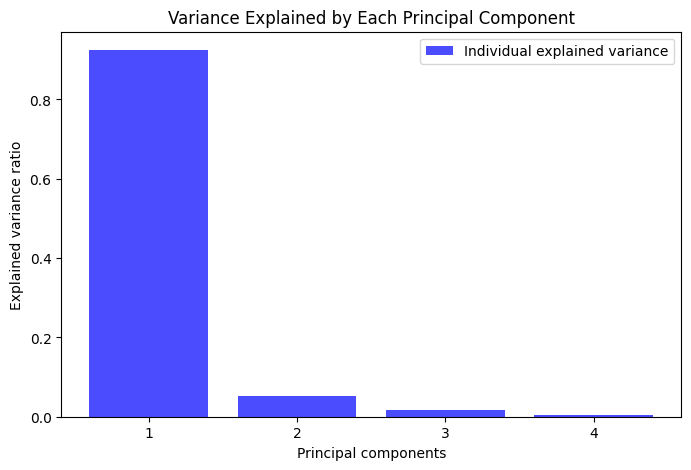

In [1]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Applying PCA
pca = PCA(n_components=4)  # Using 4 components to capture all possible variance
X_pca = pca.fit_transform(X)

# Explained Variance Ratio for each Principal Component
explained_variance_ratio = pca.explained_variance_ratio_

# Plotting the Explained Variance Ratio
plt.figure(figsize=(8, 5))
plt.bar(range(1, 5), explained_variance_ratio, alpha=0.7, color='blue', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.title('Variance Explained by Each Principal Component')
plt.xticks(range(1, 5))
plt.legend()
plt.show()


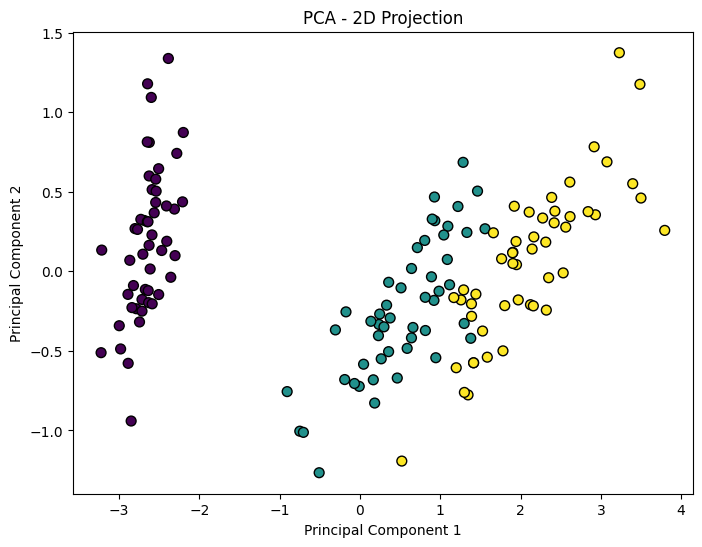

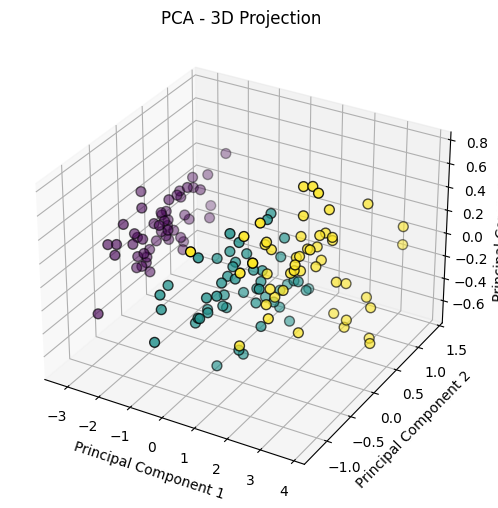

In [4]:
# Visualization in 2D, using the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA - 2D Projection')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Visualization in 3D, using the first three principal components
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=y, cmap='viridis', edgecolor='k', s=50)
ax.set_title('PCA - 3D Projection')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
plt.show()


What do you infer?

### t-SNE vs PCA
https://towardsdatascience.com/tsne-degrades-to-pca-d4abf9ef51d3

# K-means Clustering

1. Initialize:
   - Choose the number of clusters, K.
   - Randomly select K distinct data points as the initial centroids.

2. Repeat until convergence:
   - Assign each data point to the nearest centroid based on some distance measure (e.g., Euclidean distance).
   - Update each centroid to be the mean of the points assigned to it.

3. Convergence is achieved when:
   - Centroids of newly formed clusters do not change,
   - Points remain in the same cluster, or
   - Maximum iterations are reached.

4. Output the clusters and their centroids.


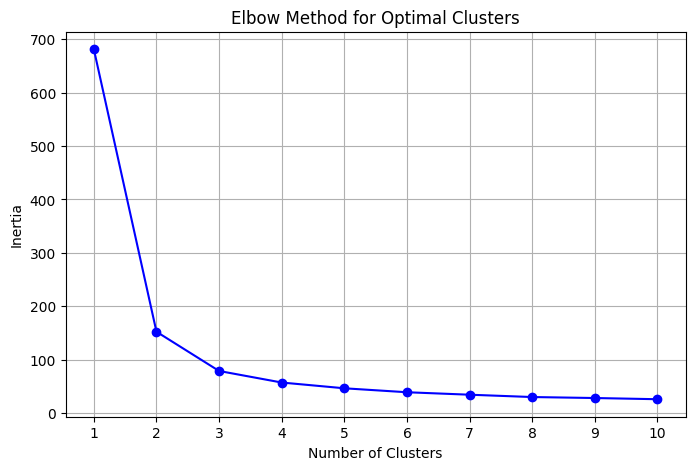

In [6]:
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import warnings

# Suppress warning messages
warnings.filterwarnings('ignore')

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Elbow method to find the optimal number of clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Method Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', color='blue')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


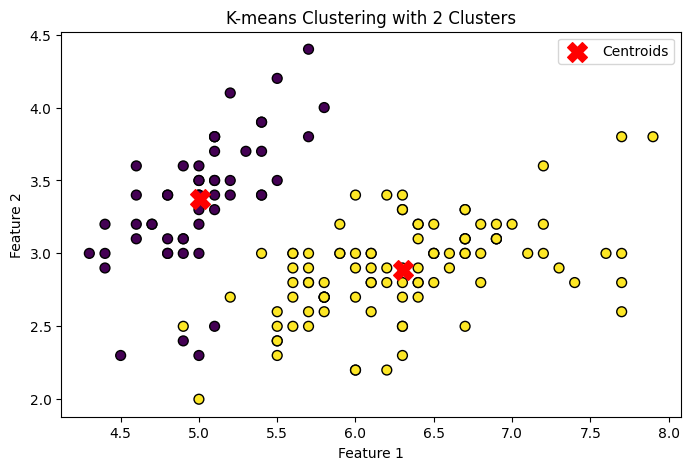

In [15]:
# visualize the clustes

# Perform K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0)
two_means_clusters = kmeans.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=two_means_clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering with 2 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

### Problems with K-means Clustering

1. Dependency on initial choice of centroids. 
2. Convergence to Local Minima.
3. Difficulty with Non-spherical Clusters
4. Sensitivity to Outliers

### K-means++
K-means++ is an improved version of K-means, specifically designed to alleviate the poor initialization issues. It provides a smarter initialization of centroids, which leads to better and more reliable clustering results, ensuring that the initial centroids are distant from each other, increasing the chance of converging to a global minimum

1. Choose one data point randomly as the first centroid.
2. For each data point, compute its distance from the nearest, previously chosen centroid.
3. Select the next centroid from the data points with a probability proportional to the square of the distance.
4. Repeat steps 2 and 3 until K centroids are chosen.


### Bisecting K-means
A variation of K-means aimed at producing more balanced clusters. Starting with all points in a single cluster and it iteratively splits the clusters until the desired number of clusters is reached. Each split is done by applying the basic K-means algorithm with K=2, and the cluster with the highest total within-cluster variation is chosen for splitting. It achieves improved clustering results, focusing on a single cluster at atime. (Optimizes internal cohesion).

1. Start with all points in a single cluster.
2. Iteratively perform the following steps until the desired number of clusters is reached:
 - Choose a cluster to split.
 - Split the cluster into two using basic K-means (K=2).
 -  Evaluate the total within-cluster variation for each split.
 - Choose the split that yields the largest decrease in the total within-cluster variation.
3. Output the final set of clusters.


# HAC

1. Start:
   - Treat each data point as a single cluster. 
   - So, if there are N data points, you start with N clusters.

2. Find the closest (most similar) pair of clusters and merge them into a single cluster:
   - Use a linkage criterion to measure the distance between clusters (e.g., minimum distance for single linkage, maximum for complete linkage, average for average linkage).

3. Repeat Step 2 until only a single cluster (or a specified number of clusters) remains.

4. Optional: Construct a dendrogram during the process.

5. Output the clusters and optionally the dendrogram.


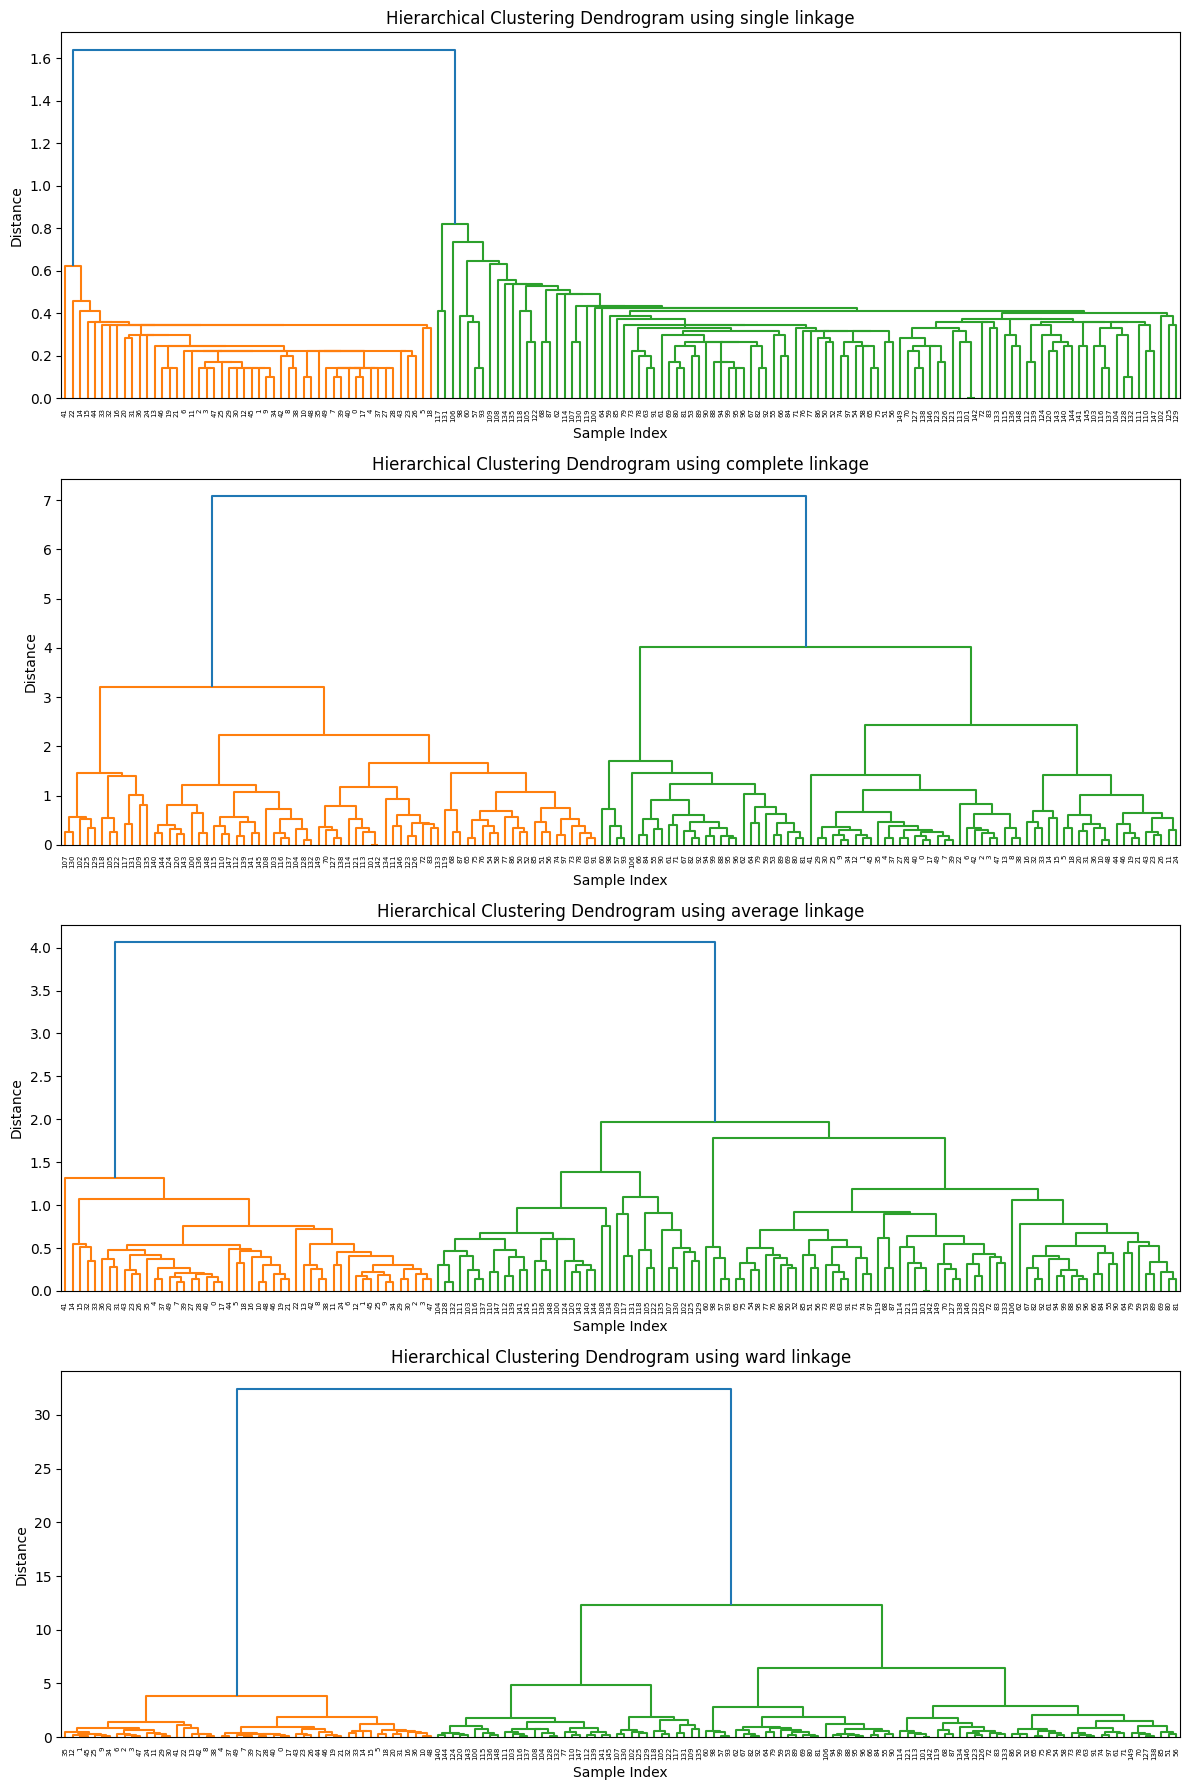

In [12]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Define linkage methods to be used
linkage_methods = ['single', 'complete', 'average', 'ward']

# Creating subplots
fig, axes = plt.subplots(4, 1, figsize=(12, 18))

for i, method in enumerate(linkage_methods):
    # Generate the linkage matrix
    Z = linkage(X, method=method)

    # Plotting the dendrogram
    axes[i].set_title(f'Hierarchical Clustering Dendrogram using {method} linkage')
    axes[i].set_xlabel('Sample Index')
    axes[i].set_ylabel('Distance')
    dendrogram(Z, ax=axes[i])

plt.tight_layout()
plt.show()



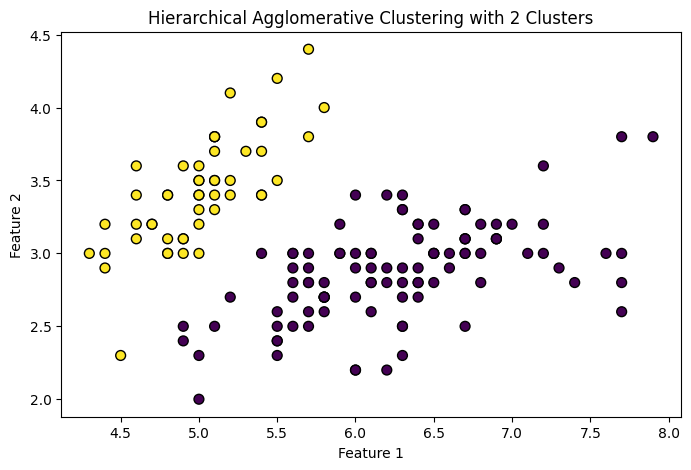

In [13]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Performing Hierarchical Agglomerative Clustering
# Let's assume we also want to create 2 clusters, similar to what we did with K-means
hac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusters = hac.fit_predict(X)

# Visualizing the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=clusters, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Hierarchical Agglomerative Clustering with 2 Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


## Cluster Evaluation

Various metrics are used. But, all have the same goal: (1) maximize inter-cluster similarity (separation) and (2) minimize intra-cluster similarity (cohesion).

* **Silhouette Index**
* * Assesses how close each point in one cluster is to points in the neighboring clusters.
* * $S(i) = (b(i) - a(i)) / max\{a(i), b(i)\}$, where `a(i)` is the mean distance between the i-th object and all other objects in the same cluster, and `b(i)` is the smallest mean distance of the i-th object to all objects in any other cluster.
* * Ranges in [0, 1]

*  **Davies-Bouldin Index (DB-index)**
* * Reflects the average 'similarity' between clusters.
$DB = (1/k) * Σ_{max}((σ_i + σ_j) / d(c_i, c_j), i ≠ j)$, where `σ_i` is the average distance of all elements in cluster `i` to the centroid `c_i` of `i`, `d(c_i, c_j)` is the distance between centroids `c_i` and `c_j`, and `k` is the number of clusters.

* **Dunn Index**
* * Identifies clusters that are compact and well-separated. 
* * The ratio of the smallest inter-cluster distance to the largest intra-cluster distance (diameter).
* * $Dunn = min(min((δ(c_i, c_j)) / max(Δ(c_l)), i ≠ j)$, where `d_{min}(c_i, c_j)` is the minimum inter-cluster distance between clusters `c_i` and `c_j`, and `d_{max}(c_l)` is the maximum intra-cluster distance of cluster `c_l`.



In [17]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Calculating the Davies-Bouldin Index
db_index = davies_bouldin_score(X, two_means_clusters)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.4042928371730435


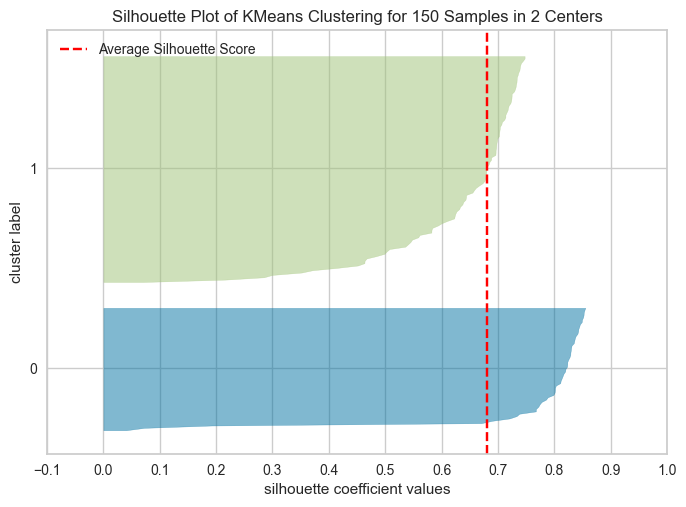

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 150 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer


# Create a SilhouetteVisualizer instance with the K-means model
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')

# Fit the data to the visualizer
visualizer.fit(X)

# Display the silhouette plot
visualizer.show()

## Density Based Clustering

Density-based clustering is a type of algorithm that identifies clusters as areas of higher density within the data space compared to the surrounding area. Unlike centroid-based algorithms like K-means, density-based clustering does not require the user to specify the number of clusters beforehand, and it can identify clusters of arbitrary shapes.

## DBSCAN (Density-Based Spatial Clustering)
DBSCAN is one of the most common density-based clustering algorithms. It works on the idea of density reachability and connectivity. A cluster is defined as a maximal set of density-connected points.

Two hyperparameters: eps and minPts.

The key concepts in DBSCAN are:
* Core Points: A core point is a point that has at least a minimum number of other points (minPts) within a given radius (eps) around it.
* Border Points: A border point has fewer than minPts within its eps neighborhood but lies within the eps radius of a core point.
* Noise Points: A noise point is any point that is not a core point nor a border point.

DBSCAN(Dataset, Epsilon, MinPoints):
    for each point in Dataset:
        if the number of points within 'Epsilon' distance of the point >= MinPoints:
            label the point as a Core Point
        else:
            label the point as Noise

    for each Core Point:
        for each point within 'Epsilon' distance of a Core Point:
            if the point is not a Core Point:
                label the point as a Border Point

    for each Noise Point:
        if the Noise Point is within 'Epsilon' distance of any Core Point:
            label the Noise Point as a Border Point

    for each point labeled as Border Point:
        if the Border Point is connected to a Core Point:
            label the Border Point as part of the Core Point's cluster

    Cluster the data by assigning each non-Noise point to the cluster of its nearest Core Point


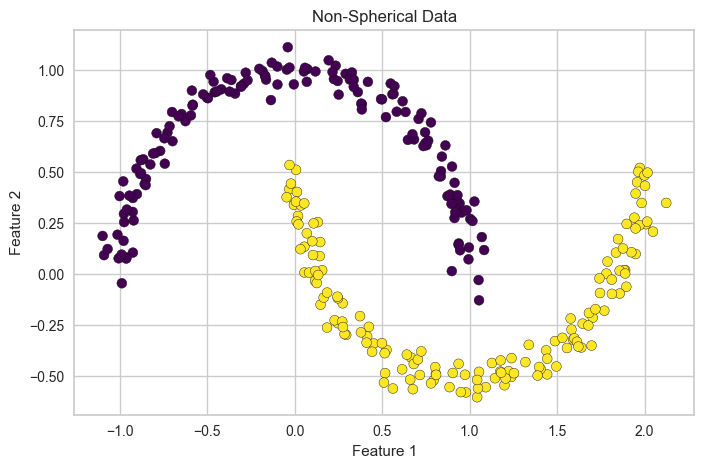

In [24]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generate non-spherical data (two interleaving half circles)
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

# plot the data
plt.figure(figsize=(8, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.title('Non-Spherical Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()




Text(0, 0.5, 'Feature 2')

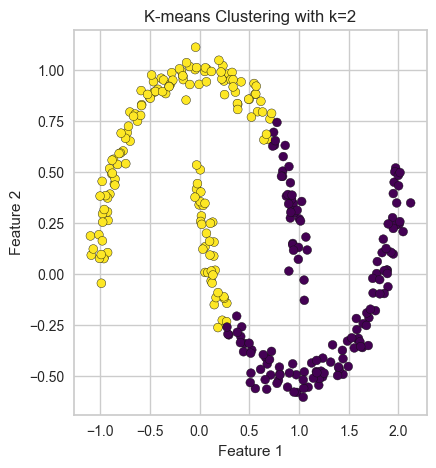

In [25]:
# Apply K-means clustering with k=2
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans_clusters = kmeans.fit_predict(X)

# Visualize K-means clustering results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_clusters, cmap='viridis', marker='o', edgecolor='k', s=40)
plt.title('K-means Clustering with k=2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

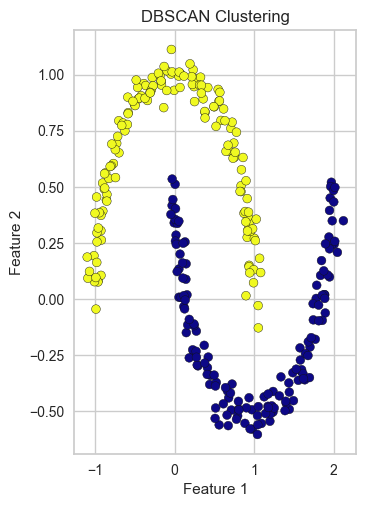

In [26]:
# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.2, min_samples=5)
dbscan_clusters = dbscan.fit_predict(X)

# Visualize DBSCAN clustering results
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_clusters, cmap='plasma', marker='o', edgecolor='k', s=40)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()

### How to choose eps and minPts?

* The minPts parameter is usually chosen based on domain knowledge.

For choosing the right eps, a common technique is to use a k-distance plot, where k is typically set to minPts. Here's the general approach:

1. k-distance Plot: For each point, compute the distance to its k-th nearest neighbor. The k-th nearest distance is the distance that you would need to at least include k points in the neighborhood of each point.
2. Plotting: Plot these distances in ascending order for all points in the dataset.
3. Elbow Method: Look for the "elbow point," where the rate of increase in the k-distance graph is sharpest. This point is often a good estimate for eps. The idea is that for points in low-density regions, the k-distance will be relatively large, whereas for points in high-density regions (i.e., within clusters), the k-distance will be small. The elbow typically represents the point where we move from high-density to low-density areas.

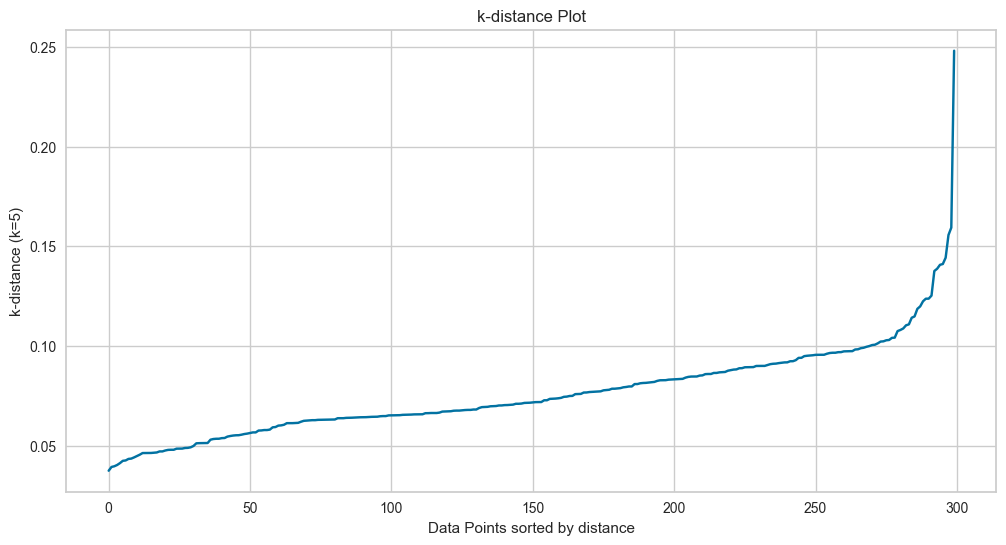

In [23]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Assuming minPts is based on domain knowledge
minPts = 5

# Generate the dataset
X, y = make_moons(n_samples=300, noise=0.05, random_state=0)

# Use NearestNeighbors to find the k-distance for each point
nbrs = NearestNeighbors(n_neighbors=minPts).fit(X)
distances, indices = nbrs.kneighbors(X)

# Sort the distances
sorted_distances = np.sort(distances[:, minPts-1], axis=0)

# Plot the k-distance plot
plt.figure(figsize=(12, 6))
plt.plot(sorted_distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('k-distance (k=5)')
plt.title('k-distance Plot')
plt.grid(True)
plt.show()


The elbow typically signifies the threshold at which the density around a point (as measured by the distance to its k-th nearest neighbor) drops off. This drop-off point is a good choice for eps because it indicates the point beyond which points are no longer densely packed. The reason for choosing the elbow point is because it represents the distance at which points transition from being in dense clusters to being in sparser, noise-like regions.